# `depth_est_ml_mqtt` Testing Notebook


In [1]:
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
from pathlib import Path
import json

#====================================================================
# Import the main functions from the uos_depth_est_core.py module
#====================================================================

from abyss.uos_depth_est_core import (
    depth_est_ml_mqtt
    )

INFO:p-60280:t-70700:config.py:<module>:PyTorch version 2.5.1 available.


In [2]:
hole_id_keys = ('Messages', 'Payload', 'nsu=http://airbus.com/IJT/ADrilling;s=Objects.DeviceSet.setitecxls.ResultManagement.Results.0.ResultMetaData.SerialNumber','Value')
position_keys = ('Messages', 'Payload', 'nsu=http://airbus.com/IJT/ADrilling;s=Objects.DeviceSet.setitecxls.ResultManagement.Results.0.ResultContent.StepResults.0.StepResultValues.Position','Value')
torque_keys = ('Messages', 'Payload', 'nsu=http://airbus.com/IJT/ADrilling;s=Objects.DeviceSet.setitecxls.ResultManagement.Results.0.ResultContent.StepResults.0.StepResultValues.Torque','Value')
torque_empty_keys = ('Messages', 'Payload', 'nsu=http://airbus.com/IJT/ADrilling;s=Objects.DeviceSet.setitecxls.ResultManagement.Results.0.ResultContent.StepResults.0.StepResultValues.TorqueEmpty','Value')
step_keys = ('Messages', 'Payload', 'nsu=http://airbus.com/IJT/ADrilling;s=Objects.DeviceSet.setitecxls.ResultManagement.Results.0.ResultContent.StepResults.0.StepResultValues.StepNb','Value')
local_keys = ('Messages', 'Payload', 'nsu=http://airbus.com/IJT/ADrilling;s=Objects.DeviceSet.setitecxls.ResultManagement.Results.0.ResultMetaData.ToolAge','Value')
predrilled_keys = ('Messages', 'Payload', 'nsu=http://airbus.com/IJT/ADrilling;s=Objects.DeviceSet.setitecxls.ResultManagement.Results.0.ResultMetaData.Predrilled','Value')


In [3]:
from functools import reduce
with open ('./data/data-wh.json') as f:
    d = json.load(f)
    position = reduce(dict.get, position_keys, d)
    torque = reduce(dict.get, torque_keys, d)
    torque_empty = reduce(dict.get, torque_empty_keys, d)
    step = reduce(dict.get, step_keys, d)
    print(step)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [4]:
with open('./data/data-wh.json') as f:
    d = json.load(f)
    # https://stackoverflow.com/questions/34209587/python-access-hierarchical-dict-element-from-list-of-keys
    position = reduce(dict.get, position_keys, d)
    torque = reduce(dict.get, torque_keys, d)
    torque_empty = reduce(dict.get, torque_empty_keys, d)
    step = reduce(dict.get, step_keys, d)
    hole_id = reduce(dict.get, hole_id_keys, d)
    local = 0 #reduce(dict.get, local_keys, d)
    predrilled = 1 #reduce(dict.get, predrilled_keys, d)
    # df = pd.DataFrame({'Position': position, 'Torque': torque, 'Torque_Empty': torque_empty})
    df = pd.DataFrame({'Position (mm)': position, 
                       'I Torque (A)': torque, 
                       'I Torque Empty (A)': torque_empty, 
                       'Step (nb)': step})
    #Expected columns: 'i_torque', 'HOLE_ID', 'step', 'xpos', 'local', 'PREDRILLED'
    df['i_torque'] = df['I Torque (A)'] + df['I Torque Empty (A)']
    df=df.astype({'Step (nb)': 'int32'})
    df['Position (mm)'] = -df['Position (mm)']
    df['HOLE_ID'] = str(hole_id)
    df['local'] = local
    df['PREDRILLED'] = predrilled

    df = df.convert_dtypes()

df.dtypes

Position (mm)                Float64
I Torque (A)                 Float64
I Torque Empty (A)           Float64
Step (nb)                      Int32
i_torque                     Float64
HOLE_ID               string[python]
local                          Int64
PREDRILLED                     Int64
dtype: object

<Axes: >

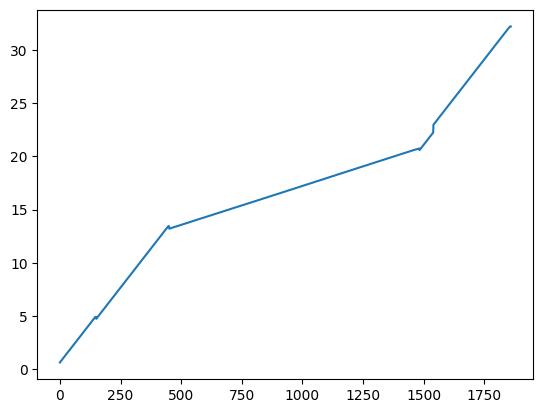

In [5]:
df['Position (mm)'].plot()

In [6]:
import plotly.express as px
px.line(df, x='Position (mm)', y=['i_torque', 'Step (nb)'],  title='Torque vs Position')

In [10]:
from abyss.uos_depth_est_core import convert_mqtt_to_df

with open ('./data/data-wh.json') as f:
    d = f.read()
    df = convert_mqtt_to_df(d)
df.dtypes

Position (mm)         float64
I Torque (A)          float64
I Torque Empty (A)    float64
Step (nb)               int32
HOLE_ID                object
local                   int64
PREDRILLED              int64
dtype: object

In [12]:
import paho.mqtt.client as mqtt

In [7]:
with open ('./data/data-wh.json') as f:
    d = f.read()
    depth = depth_est_ml_mqtt(d)
    print(depth)

C:\Users\windo\Documents\github\uos-drilling-wh\abyss\src\abyss/trained_model/has_tool_age_predrilling/cv4


100%|██████████| 1/1 [00:00<00:00, 333.41it/s]


C:\Users\windo\Documents\github\uos-drilling-wh\abyss\src\abyss/trained_model/has_tool_age_predrilling/cv4


100%|██████████| 40/40 [00:01<00:00, 38.45it/s]

(4.805, 17.732850122451783)
